In [1]:
import sklearn
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
from sklearn.tree import DecisionTreeClassifier
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,
                                               random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print(f"Accuracy on training set: {tree.score(X_train,y_train)}")
print(f"Accuracy on test set: {tree.score(X_test,y_test)}")

Accuracy on training set: 1.0
Accuracy on test set: 0.9370629370629371


In [3]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print(f"Accuracy on training set: {tree.score(X_train,y_train)}")
print(f"Accuracy on test set: {tree.score(X_test,y_test)}")

Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.951048951048951


In [4]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(tree,out_file="tree.dot",class_names=["malignant","benign"],
               feature_names=cancer.feature_names,impurity=False,filled=True)

In [5]:
print(f"Feature importances:\n {tree.feature_importances_}")

Feature importances:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


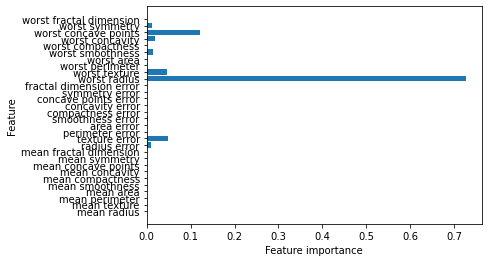

In [6]:
def plot_feature_importances_cancer(model):
    n_features=cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align="center")
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


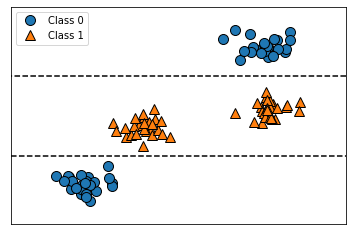

In [7]:
tree=mglearn.plots.plot_tree_not_monotone()

Text(0, 0.5, 'Price in $/Mbyte')

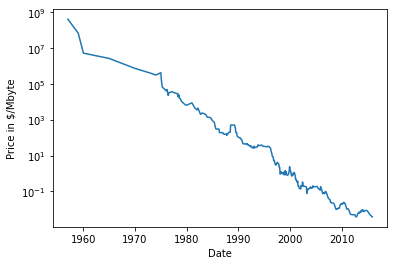

In [8]:
ram_prices=pd.read_csv("data/ram_price.csv")
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("Date")
plt.ylabel("Price in $/Mbyte")

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train=ram_prices[ram_prices.date<2000]
data_test=ram_prices[ram_prices.date>=2000]
X_train=data_train.date[:,np.newaxis]
y_train=np.log(data_train.price)
tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)
X_all=ram_prices.date[:,np.newaxis]
pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

C:\Users\Daniel\anaconda3\envs\py37ml\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
C:\Users\Daniel\anaconda3\envs\py37ml\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':


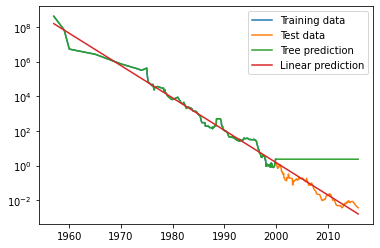

In [10]:
plt.semilogy(data_train.date,data_train.price,label="Training data")
plt.semilogy(data_test.date,data_test.price,label="Test data")
plt.semilogy(ram_prices.date,price_tree,label="Tree prediction")
plt.semilogy(ram_prices.date,price_lr,label="Linear prediction")
plt.legend()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100,noise=0.25,random_state=30)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)
forest=RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

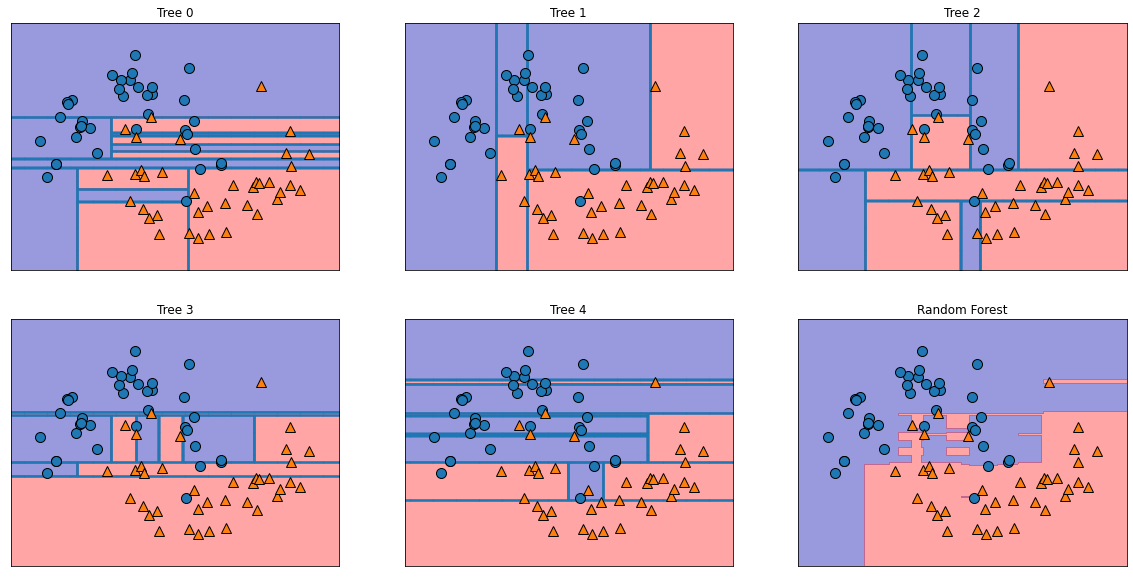

In [12]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"Tree {i}")
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)
mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

In [13]:
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)
print(f"Accuracy on training set: {forest.score(X_train,y_train)}")
print(f"Accuracy on test set: {forest.score(X_test,y_test)}")

Accuracy on training set: 1.0
Accuracy on test set: 0.972027972027972


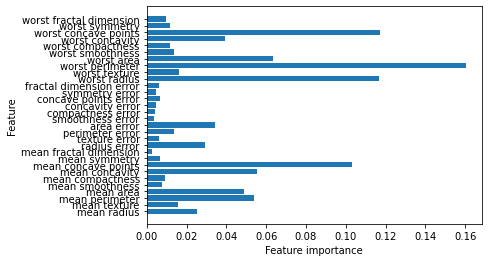

In [14]:
plot_feature_importances_cancer(forest)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)
print(f"Accuracy on training set: {gbrt.score(X_train,y_train)}")
print(f"Accuracy on test set: {gbrt.score(X_test,y_test)}")

Accuracy on training set: 1.0
Accuracy on test set: 0.965034965034965


In [16]:
gbrt=GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)
print(f"Accuracy on training set: {gbrt.score(X_train,y_train)}")
print(f"Accuracy on test set: {gbrt.score(X_test,y_test)}")

Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.965034965034965


In [17]:
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)
print(f"Accuracy on training set: {gbrt.score(X_train,y_train)}")
print(f"Accuracy on test set: {gbrt.score(X_test,y_test)}")

Accuracy on training set: 0.9906103286384976
Accuracy on test set: 0.972027972027972


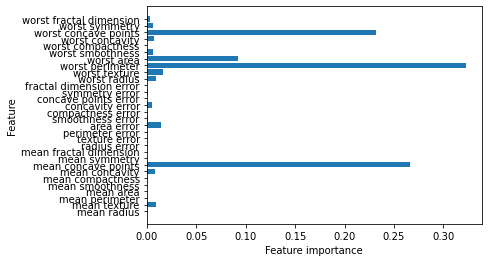

In [18]:
plot_feature_importances_cancer(gbrt)

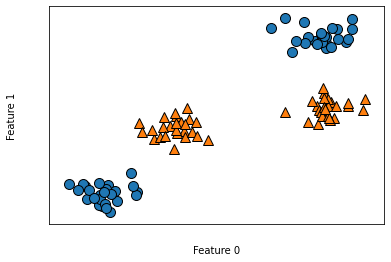

In [28]:
from sklearn.datasets import make_blobs
X,y= make_blobs(centers=4,random_state=8)
y=y%2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.tick_params(color="white",labelcolor="white")

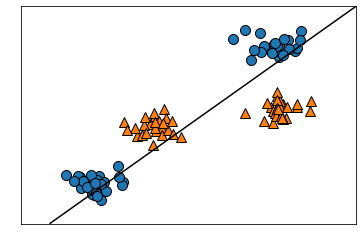

In [29]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC(max_iter=10000).fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0",color="white")
plt.ylabel("Feature 1",color="white")
plt.tick_params(color="white",labelcolor="white")

Text(0.5, 0, 'Feature1 ** 2')

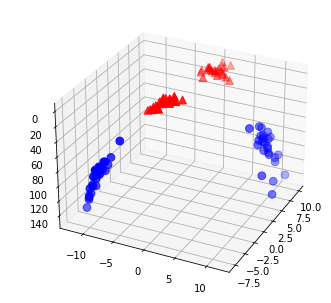

In [35]:
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D,axes3d
figure=plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)

mask= y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c="b",cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c="r",marker="^",
           cmap=mglearn.cm2,s=60)
ax.set_xlabel("Feature0",color="white")
ax.set_ylabel("Feature1",color="white")
ax.set_zlabel("Feature1 ** 2",color="white")



[ 0.13008345 -0.22027484 -0.05969582]
[1.17337248]


Text(0.5, 0, 'Feature1 ^ 2')

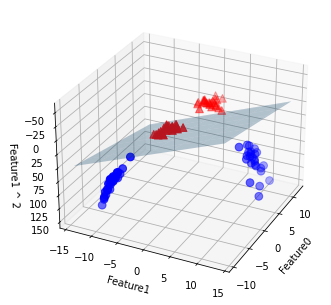

In [44]:
linear_svm_3d = LinearSVC(max_iter=10000).fit(X_new,y)
coef,intercept=linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
print(coef)
print(intercept)

figure=plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)
xx=np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

XX,YY=np.meshgrid(xx,yy)
ZZ=(coef[0]*XX + coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c="b",cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c="r",marker="^",
           cmap=mglearn.cm2,s=60)
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1 ^ 2")

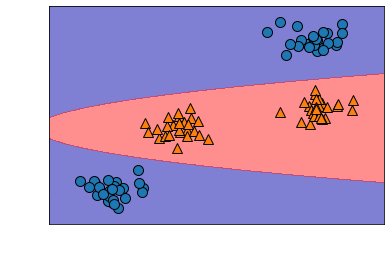

In [45]:
ZZ=YY**2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],
            cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0",color="white")
plt.ylabel("Feature 1",color="white")
plt.tick_params(color="white",labelcolor="white")

[False False False  True  True]
[-10.          -6.25178295  -3.73381586  10.           9.98559881]
[[ 8.1062269   4.28695977]
 [ 9.50169345  1.93824624]
 [11.563957    1.3389402 ]
 [10.24028948  2.45544401]
 [ 7.99815287  4.8525051 ]]


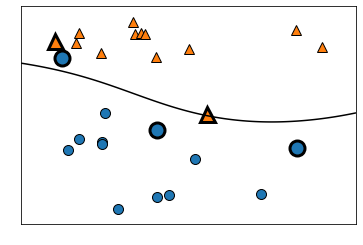

In [49]:
from sklearn.svm import SVC
X,y=mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel="rbf",C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
sv=svm.support_vectors_
sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("Feature 0",color="white")
plt.ylabel("Feature 1",color="white")
print(sv_labels)
print(svm.dual_coef_.ravel())
print(sv)

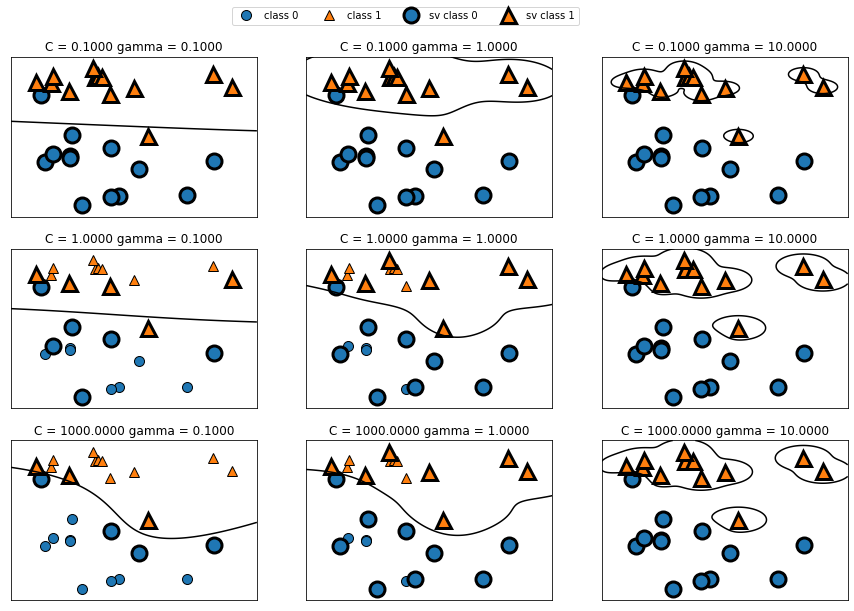

In [50]:
fig,axes=plt.subplots(3,3,figsize=(15,10))
for ax, C in zip(axes,[-1,0,3]):
    for a, gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)
axes[0,0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                 ncol=4, loc=(.9, 1.2))


In [52]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
svc=SVC()
svc.fit(X_train,y_train)
print(f"Accuracy on training set: {svc.score(X_train,y_train)}")
print(f"Accuracy on test set: {svc.score(X_test,y_test)}")

Accuracy on training set: 0.903755868544601
Accuracy on test set: 0.9370629370629371


[[1.185e+01 1.746e+01 7.554e+01 ... 9.140e-02 3.101e-01 7.007e-02]
 [1.122e+01 1.986e+01 7.194e+01 ... 2.022e-02 3.292e-01 6.522e-02]
 [2.013e+01 2.825e+01 1.312e+02 ... 1.628e-01 2.572e-01 6.637e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]


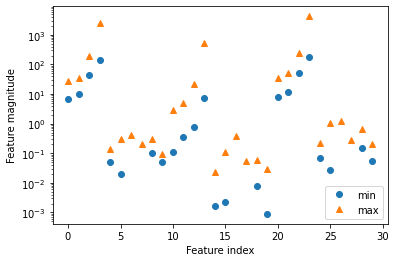

In [55]:
plt.plot(X_train.min(axis=0),"o",label="min")
plt.plot(X_train.max(axis=0),"^",label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")


In [58]:
print(X_train.min(axis=0))
print(X_train.max(axis=0))

[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
[2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]


In [60]:
min_on_training=X_train.min(axis=0)
range_on_training=(X_train-min_on_training).max(axis=0)
X_train_scaled=(X_train - min_on_training)/range_on_training
print(f"Minimum of each feature\n{X_train_scaled.min(axis=0)}")
print(f"Maximum of each feature\n{X_train_scaled.max(axis=0)}")

Minimum of each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum of each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [61]:
X_test_scaled=(X_test - min_on_training)/range_on_training

In [64]:
svc=SVC()
svc.fit(X_train_scaled,y_train)
print(f"Accuracy on training set: {svc.score(X_train_scaled,y_train)}")
print(f"Accuracy on test set: {svc.score(X_test_scaled,y_test)}")

Accuracy on training set: 0.9835680751173709
Accuracy on test set: 0.972027972027972


In [82]:
svc=SVC(C=50)
svc.fit(X_train_scaled,y_train)
print(f"Accuracy on training set: {svc.score(X_train_scaled,y_train)}")
print(f"Accuracy on test set: {svc.score(X_test_scaled,y_test)}")

Accuracy on training set: 0.9953051643192489
Accuracy on test set: 0.9790209790209791
